In [181]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import math
import sys

# time change (discrete time)
T = 1095.0 #days
dt = 0.0004
#time array
t = np.linspace(0, T, int(T/dt))



# array  to store  the  solution if you were using Euler's method
N = np.zeros((len(t)))
P1 = np.zeros((len(t)))
P2 = np.zeros((len(t)))
C = np.zeros((len(t)))
light = np.zeros((len(t)))
N[0] = 1
P1[0] = 0.5
P2[0] = 0.5
C[0] = 0.5

#initial light irradiance (constant)
I_naughts = np.empty(len(t))

#inital light irradiance (seasonal)
I_max = 25
I_min = -6

i = 0
for a in t:
    if a>1095.0:
        I_naughts[i] = I_min
    else:
        I_naughts[i] = I_min + (I_max-I_min)/2.*(np.sin(((a)/365*2*np.pi-np.pi/2))+1)
    i = i + 1

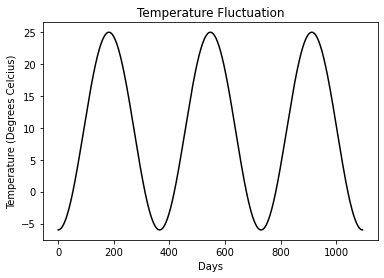

In [182]:
plt.plot(t, I_naughts, color = 'black')
plt.title('Temperature Fluctuation')
plt.xlabel('Days')
plt.ylabel('Temperature (Degrees Celcius)')

plt.savefig('temperature_fluctuation.png', bbox_inches='tight', dpi=300)

In [177]:
# values from tables.docx
phi1 = 0.2 #interaction strength for p1
phi2 = 0.1 #interaction strength for p2
mu1 = 3.0 #resource affinity parameter for p1
mu2 = 2.0 #resource affinity parameter for p2
eps1 = 0.4 #transfer efficiency for p1
eps2 = 0.3 #transfer efficiency for p2
delta1 = 0.1 #producer mortality
delta2 = 0.1 #producer mortality
deltaC = 0.1 #consumer mortality
deltaN = 0.01 #nutrient degredation


S_R = 1 #resource supply

#S_R = (m_p*m_c)/(eps1*phi1)

##dR = S_R - mu1*R*P1 - mu2*R*P2 - m_r*R 
##dP1 = (mu1*R*P1) - (phi1*P1*C) - (m_p*P1) 
##dP2 = (mu2*R*P2) - (phi2*P2*C) - (m_p*P2) 
##dC = (eps1*phi1*P1*C)+(eps2*phi2*P2*C) - (m_c*C) 

In [178]:
for i in range(1, len(t)):
        dNdt = S_R - (mu1*N[i-1]*P1[i-1]) - (mu2*N[i-1]*P2[i-1]) - deltaN*N[i-1]
        dP1dt = (mu1*N[i-1]*P1[i-1]) - (phi1*P1[i-1]*C[i-1]) - (delta1*P1[i-1])
        dP2dt = (mu2*N[i-1]*P2[i-1]) - (phi2*P2[i-1]*C[i-1]) - (delta2*P2[i-1])
        dCdt = (eps1*phi1*P1[i-1]*C[i-1]) + (eps2*phi2*P2[i-1]*C[i-1]) - (deltaC*C[i-1])
        N[i] = N[i-1] + dNdt * dt
        P1[i] = P1[i-1] + dP1dt * dt
        P2[i] = P2[i-1] + dP2dt * dt
        C[i] = C[i-1] + dCdt * dt


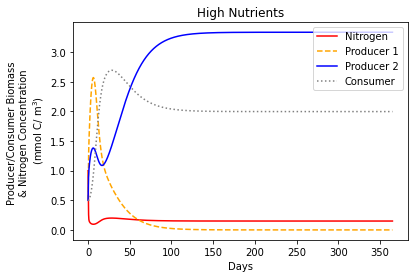

In [180]:
plt.plot(t,N, color ='red')
plt.plot(t,P1, '--', color = 'orange')
plt.plot(t,P2, 'blue')
plt.plot(t,C, linestyle = 'dotted', color='gray')
plt.legend(['Nitrogen','Producer 1','Producer 2', 'Consumer'], loc ='upper right')
plt.xlabel('Days')
plt.ylabel('Producer/Consumer Biomass \n& Nitrogen Concentration \n (mmol C/ m$^{3}$)')
plt.title('High Nutrients')

plt.savefig('stable_nutrients1.png', bbox_inches='tight', dpi=300)

plt.show()